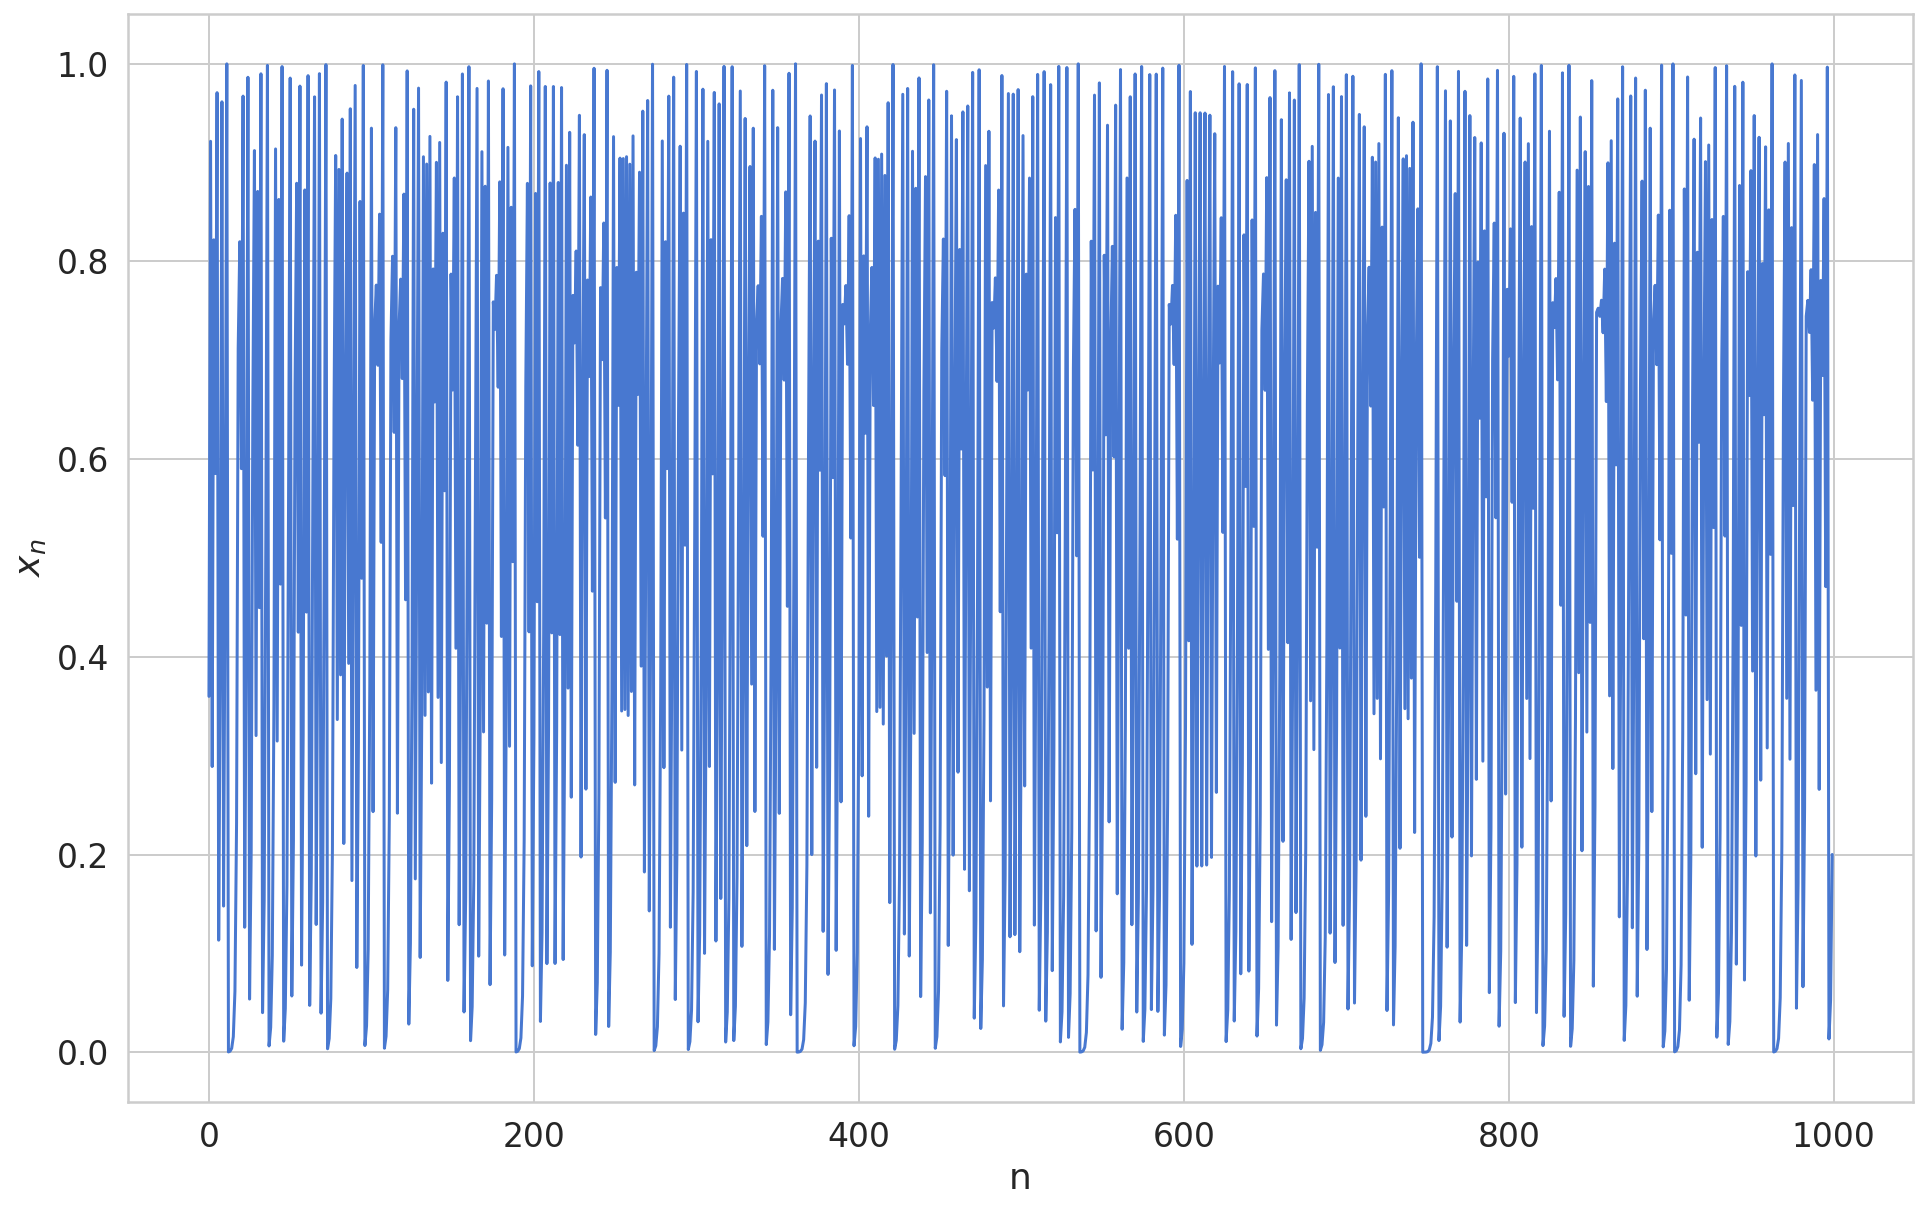

800 200
(790, 10, 1) (790,)


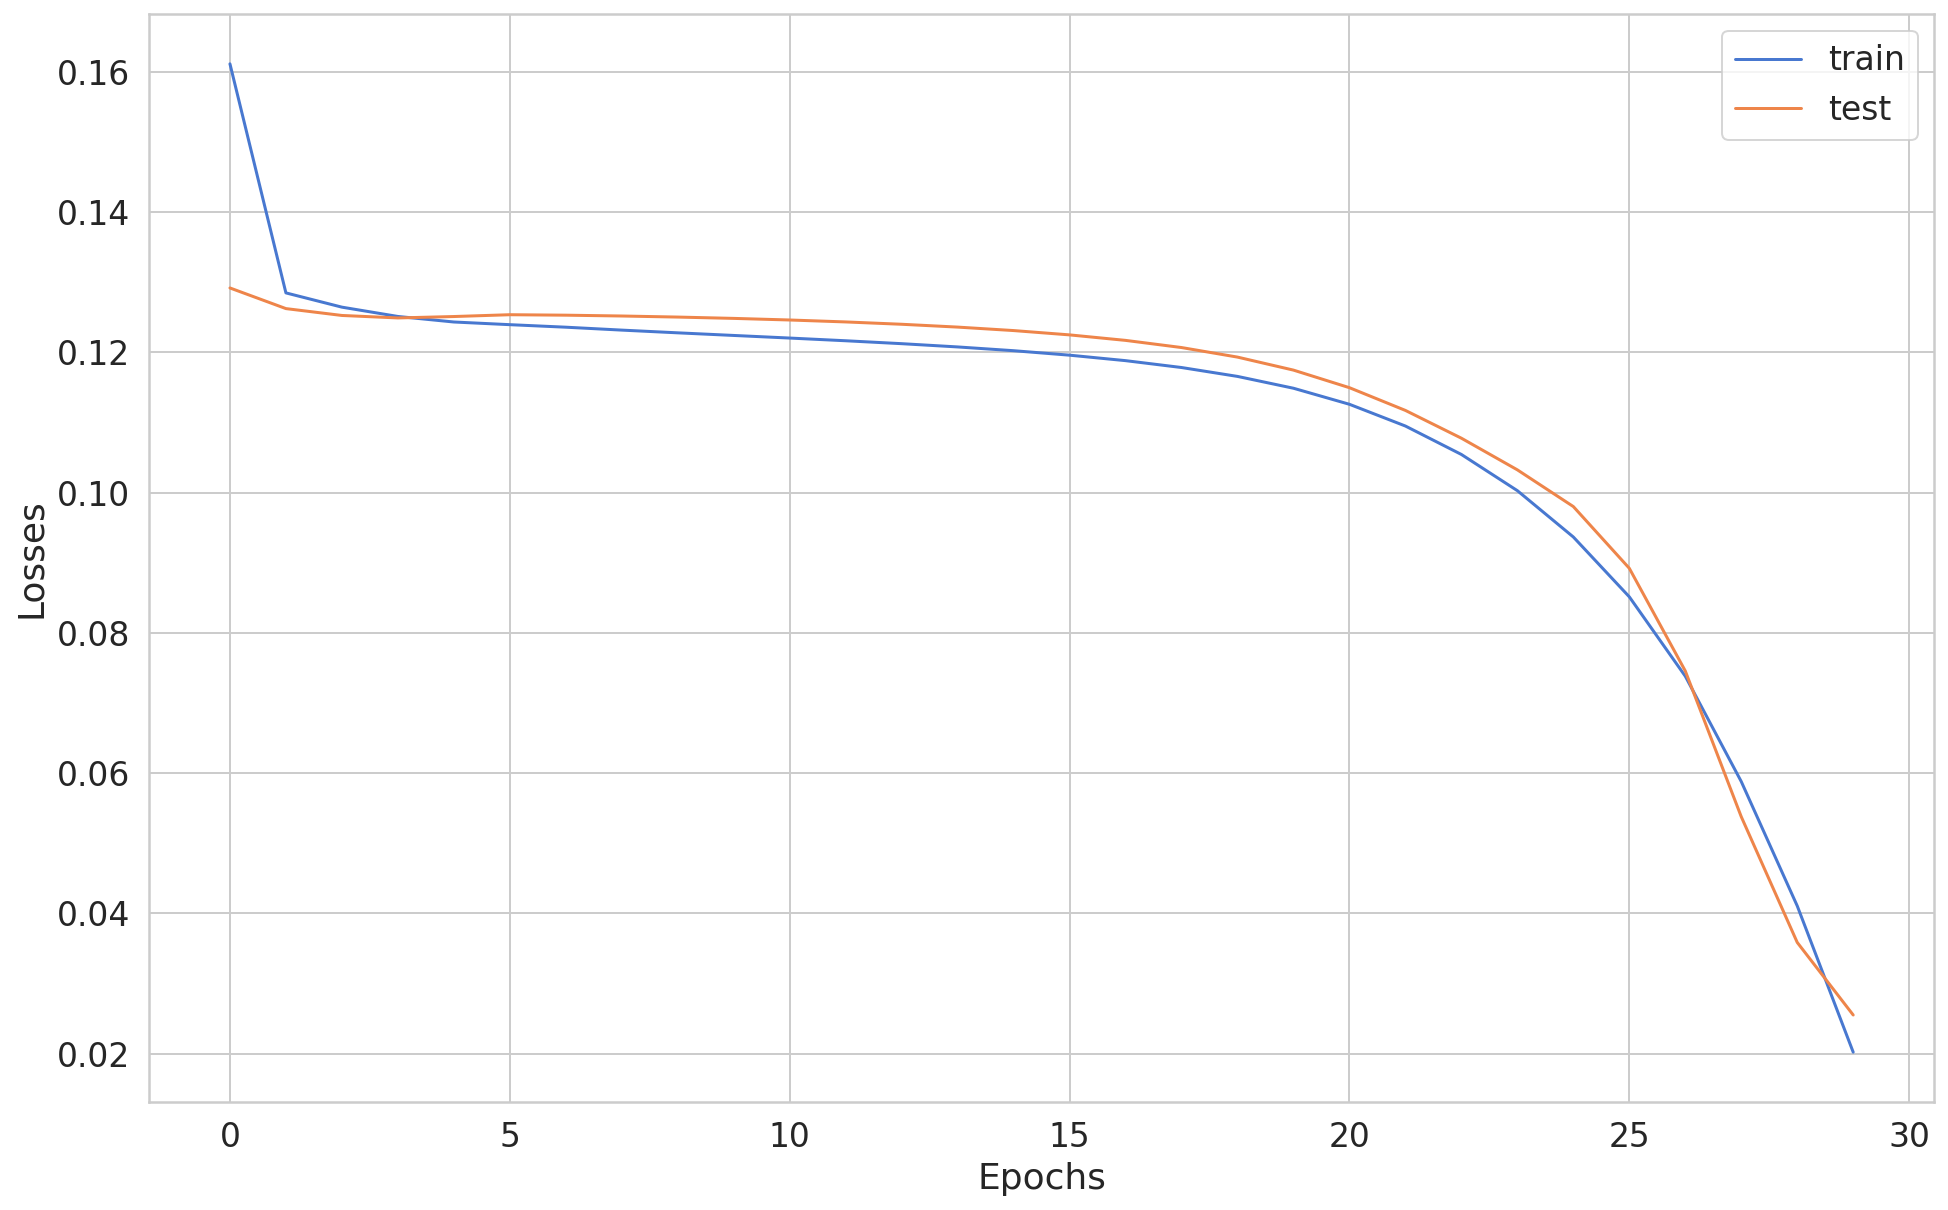

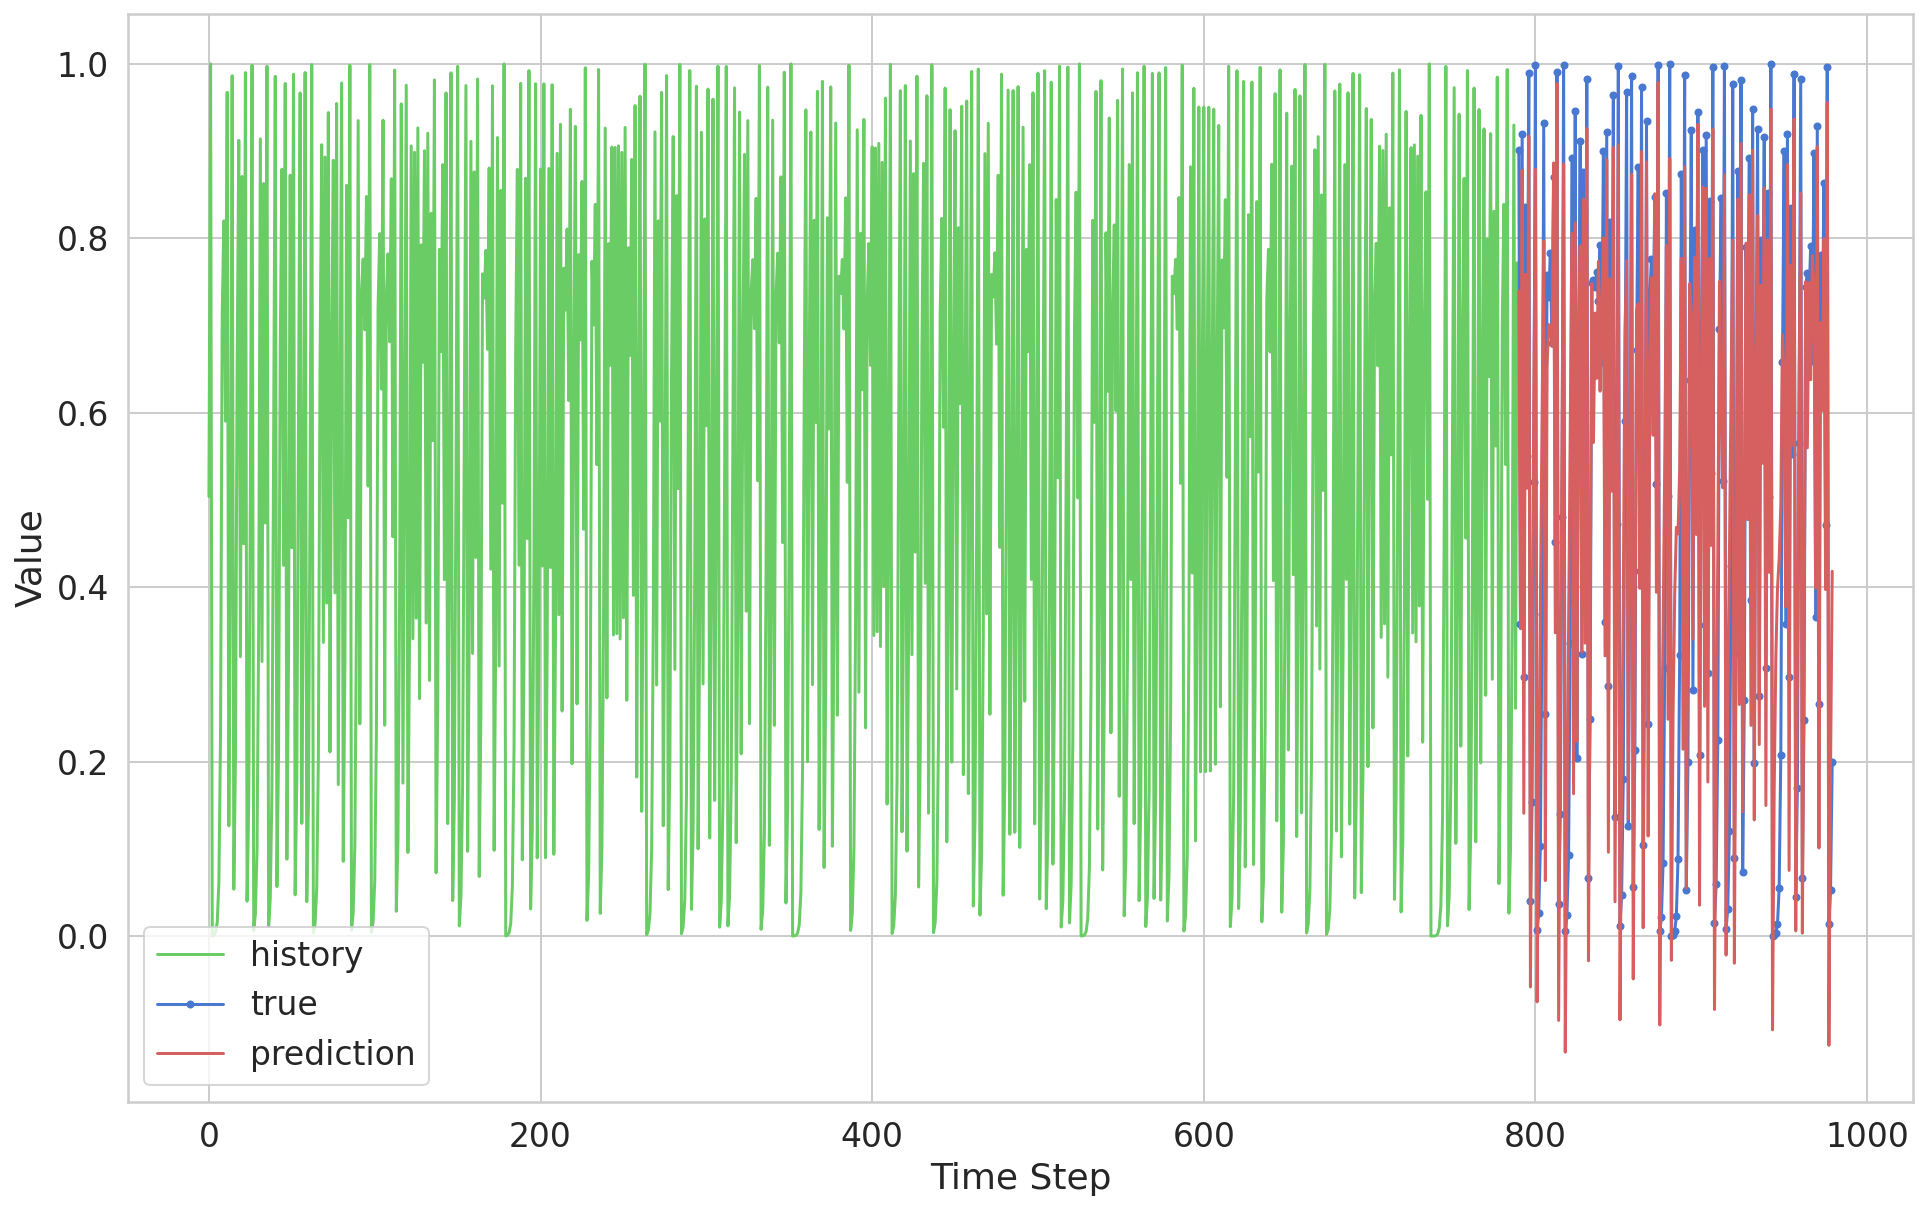

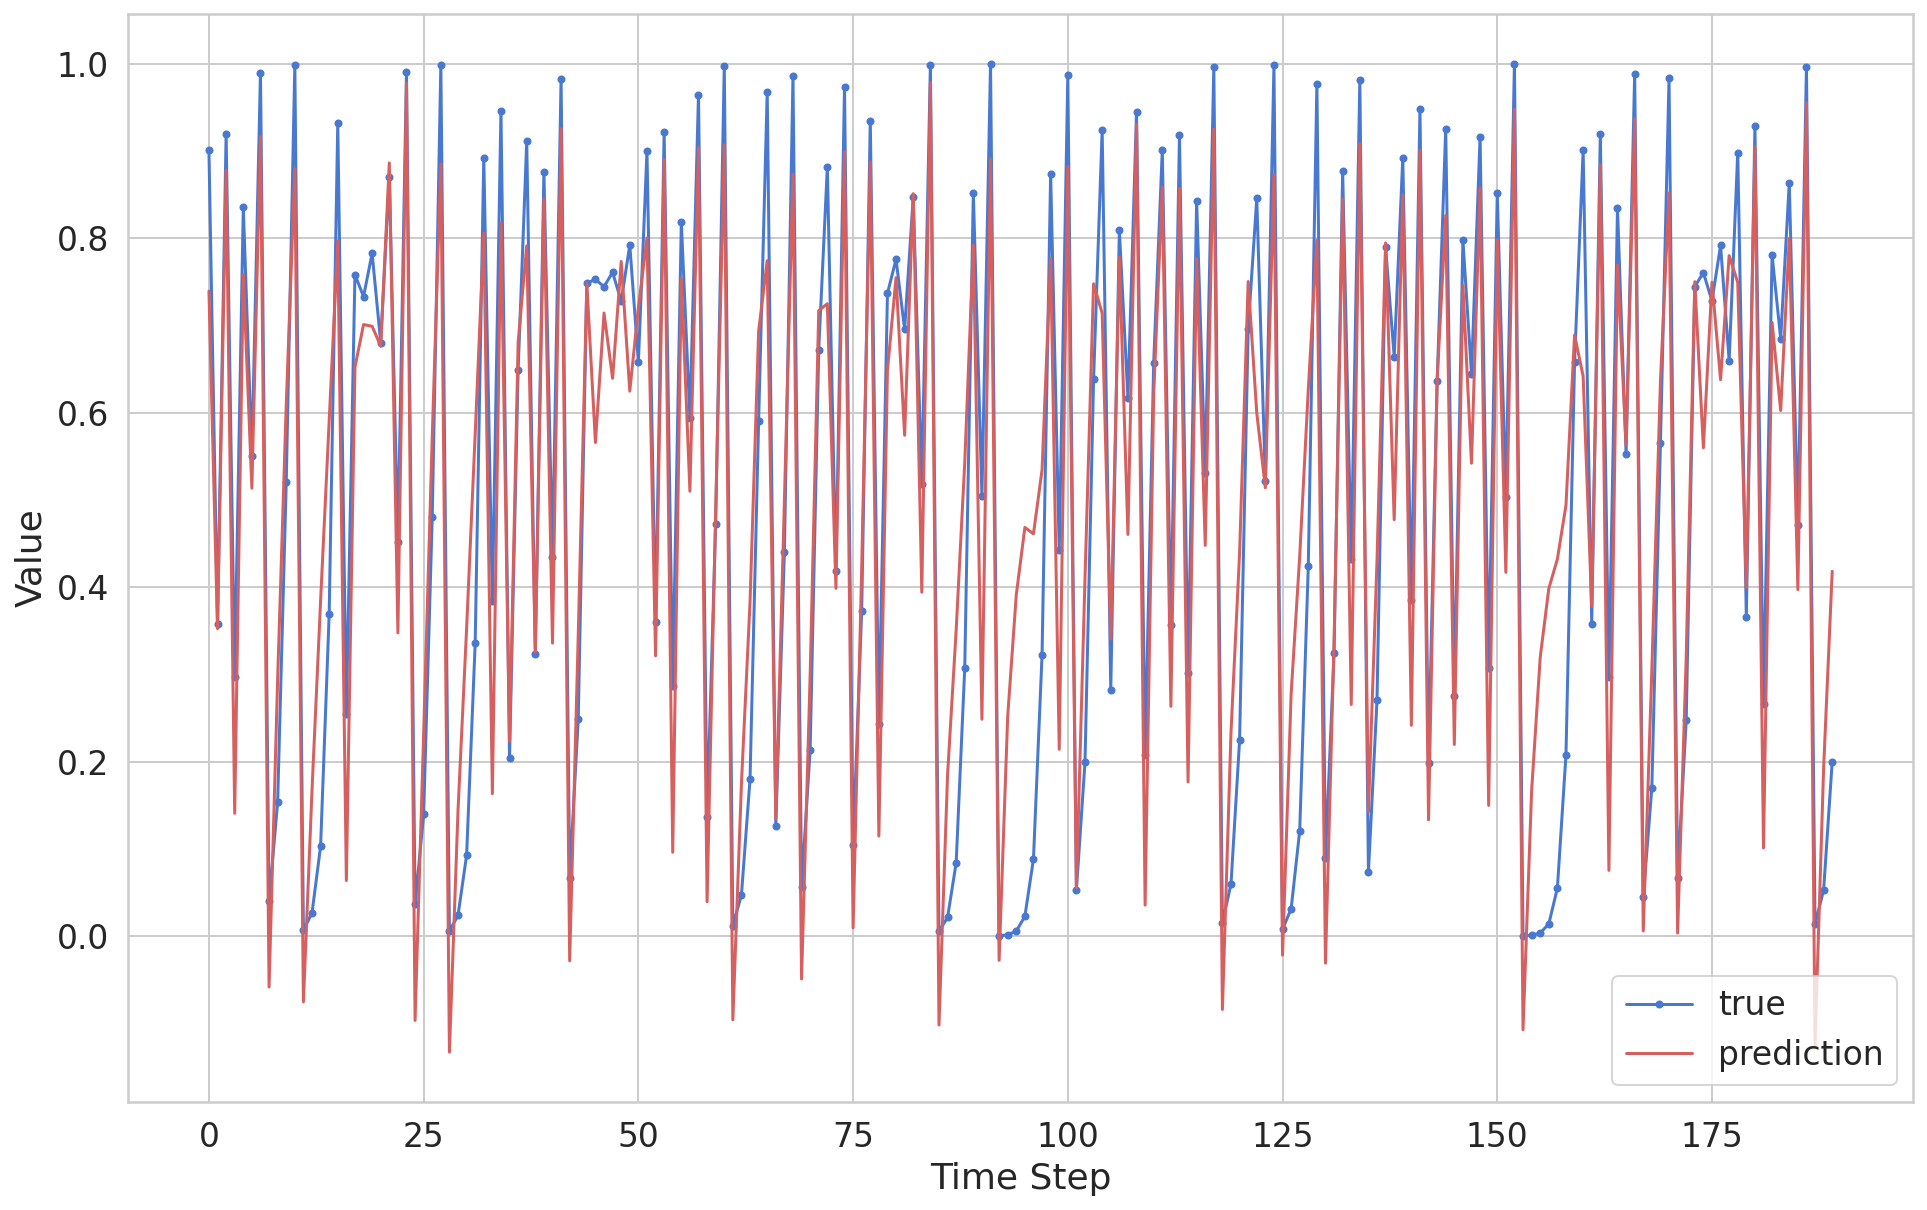

In [ ]:
# Program_19c.ipynb: Predicting chaotic time series.
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
# Set up the figure.
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
rcParams['figure.figsize'] = 16, 10
# Create a cha0tic time series using the logistic map function.
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
x = 0.1
chaos = []
for t in range(1000):
  x = 4 * x * (1 - x)
  chaos = np.append(chaos,x)
time = np.arange(0, 100, 0.1)
plt.plot(chaos)
plt.xlabel("n")
plt.ylabel("$x_n$")
plt.show()
# Set up a data frame of the time series data.
df = pd.DataFrame(dict(chaos=chaos), index=time, columns=['chaos'])
df.head()
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)        
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)
time_steps = 10
# Reshape to [samples, time_steps, n_features]
X_train, y_train = create_dataset(train, train.chaos, time_steps)
X_test, y_test = create_dataset(test, test.chaos, time_steps)
print(X_train.shape, y_train.shape)
# Set up the RNN using Keras and TensorFlow.
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))
history = model.fit(X_train, y_train, epochs=30, batch_size=16, 
                    validation_split=0.1, verbose=0, shuffle=False)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.legend()
plt.show()
# Plot the predicted and actual values.
y_pred = model.predict(X_test)
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()
# Show the predicted and actual values for the last 200 iterates.
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()